In [14]:
import pandas as pd
pd.set_option('display.expand_frame_repr', False)


# Create a dictionary with column names as keys and descriptions as values
data = {
    "survival": {
        "Definition": "Survival",
        "Key": {0: "No", 1: "Yes"}
    },
    "pclass": {
        "Definition": "Ticket class",
        "Key": {1: "1st", 2: "2nd", 3: "3rd"}
    },
    "sex": {"Definition": "Sex"},
    "Age": {"Definition": "Age in years"},
    "sibsp": {"Definition": "Number of siblings/spouses aboard the Titanic"},
    "parch": {"Definition": "Number of parents/children aboard the Titanic"},
    "ticket": {"Definition": "Ticket number"},
    "fare": {"Definition": "Passenger fare"},
    "cabin": {"Definition": "Cabin number"},
    "embarked": {
        "Definition": "Port of Embarkation",
        "Key": {"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"}
    }
}

# Create the DataFrame from the dictionary
df = pd.DataFrame(data)

#print(df)

pivoted_df = df.T

# Print the pivoted DataFrame
print(pivoted_df)


                                             Definition                                                Key
survival                                       Survival                                {0: 'No', 1: 'Yes'}
pclass                                     Ticket class                     {1: '1st', 2: '2nd', 3: '3rd'}
sex                                                 Sex                                                NaN
Age                                        Age in years                                                NaN
sibsp     Number of siblings/spouses aboard the Titanic                                                NaN
parch     Number of parents/children aboard the Titanic                                                NaN
ticket                                    Ticket number                                                NaN
fare                                     Passenger fare                                                NaN
cabin                                

- pclass: A proxy for socio-economic status (SES)

    - 1st = Upper class
    - 2nd = Middle class
    - 3rd = Lower class
- age: Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5.

- sibsp: The dataset defines family relations as follows:

    - Sibling: brother, sister, stepbrother, stepsister
    - Spouse: husband, wife (mistresses and fiancés were ignored)
- parch: The dataset defines family relations as follows:

    - Parent: mother, father
    - Child: daughter, son, stepdaughter, stepson
    - Some children traveled only with a nanny, therefore parch=0 for them.

1. Data Preprocessing

- Loading Data
- Handling Missing Values
- Encoding Categorical Variables
- Feature Scaling
- Exploratory Data Analysis (EDA)


In [15]:
import pandas as pd

# Load the Titanic dataset
data = pd.read_csv('C:/Users/L E N O V O/data science/train.csv')


In [16]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values in 'Age' with the median age
data['Age'].fillna(data['Age'].median(), inplace=True)

# Drop rows where 'Embarked' is missing
data.dropna(subset=['Embarked'], inplace=True)



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


C:\Users\L E N O V O\AppData\Local\Temp\ipykernel_9988\3151642978.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


In [17]:
# Many machine learning algorithms require numerical input, so we need to convert categorical variables into numerical ones

# Convert 'Sex' into numerical values
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' into numerical values using one-hot encoding
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)



- One-hot encoding transforms categorical variables into a series of binary variables. For example, the 'Embarked' column has three possible values: 'C', 'Q', and 'S'. One-hot encoding will create three new columns (Embarked_C, Embarked_Q, Embarked_S), each containing binary values (0 or 1) indicating the presence of each category.

However, with drop_first=True, one column is dropped to avoid multicollinearity, which can cause issues in models like regression. For 'Embarked', if we drop the first column ('Embarked_C'), the remaining columns will indicate if the passenger embarked from 'Q' or 'S'. If both columns are 0, it means the passenger embarked from 'C'.

In [13]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])
print(data[['Age','Fare']])


          Age      Fare
0   -0.563674 -0.500240
1    0.669217  0.788947
2   -0.255451 -0.486650
3    0.438050  0.422861
4    0.438050 -0.484133
..        ...       ...
886 -0.178396 -0.384475
887 -0.794841 -0.042213
888 -0.101340 -0.174084
889 -0.255451 -0.042213
890  0.206883 -0.490173

[889 rows x 2 columns]


Feature scaling standardizes the range of independent variables. StandardScaler transforms data such that the mean of each feature becomes 0 and the standard deviation becomes 1. This is achieved by the formula:

z= (x−μ) / σ

where 
𝑥 is the original value.
μ is the mean of the feature, and 
σ is the standard deviation.


Imagine you're comparing the heights and weights of people. Height might be measured in centimeters (e.g., 170 cm) and weight in kilograms (e.g., 70 kg). If you don't scale these values, height will dominate any analysis simply because its numbers are larger. By scaling, you transform these values so they are on a similar scale, allowing for meaningful comparison.

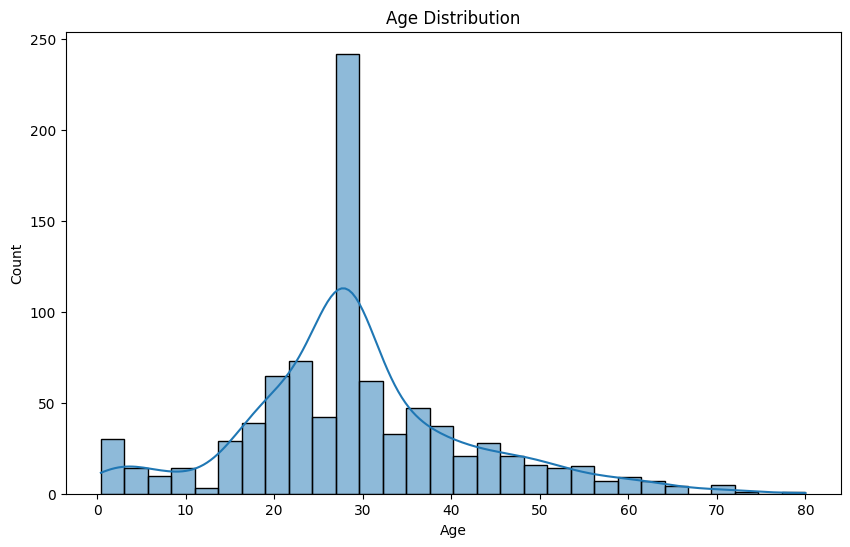

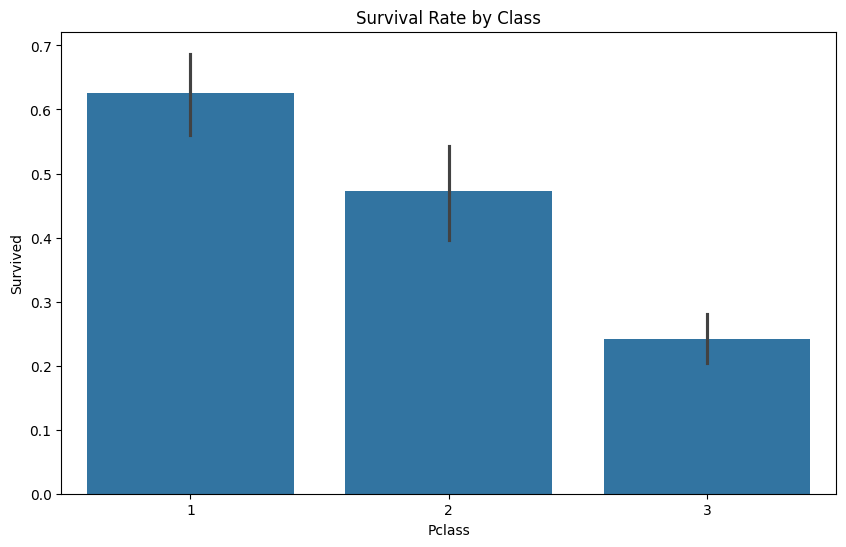

In [21]:
# EDA involves visualizing the data to understand its distribution and relationships between variables.

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Plot the survival rate by class
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rate by Class')
plt.show()



## Age Distribution Chart:

- Purpose: To visualize the distribution of ages among passengers.
- Information:
    - Peaks and Troughs: Shows where most passengers' ages cluster.
    - Spread: Indicates the range and variability of ages.
    - KDE Line: Smoothens the distribution, showing the density of data points.


## Survival Rate by Class Chart:

- Purpose: To visualize the relationship between ticket class and survival rate.
- Information:
    - Comparison: Shows how survival rates differ across classes.
    - Trends: Indicates which class had higher or lower chances of survival.

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Create a sample DataFrame
data = pd.DataFrame({
    'Passenger': [1, 2, 3, 4],
    'Embarked': ['C', 'Q', 'S', 'C'],
    'Age': [22, 38, 26, 35],
    'Fare': [7.25, 71.28, 7.92, 53.10]
})

print("Original DataFrame:")
print(data)

# One-hot encode the 'Embarked' column with drop_first=True
data_encoded = pd.get_dummies(data, columns=['Embarked'], drop_first=True)
print("\nDataFrame after One-Hot Encoding:")
print(data_encoded)

# Standardize the 'Age' and 'Fare' columns
scaler = StandardScaler()
data_encoded[['Age', 'Fare']] = scaler.fit_transform(data_encoded[['Age', 'Fare']])

print("\nDataFrame after Standardization:")
print(data_encoded)



Original DataFrame:
   Passenger Embarked  Age   Fare
0          1        C   22   7.25
1          2        Q   38  71.28
2          3        S   26   7.92
3          4        C   35  53.10

DataFrame after One-Hot Encoding:
   Passenger  Age   Fare  Embarked_Q  Embarked_S
0          1   22   7.25       False       False
1          2   38  71.28        True       False
2          3   26   7.92       False        True
3          4   35  53.10       False       False

DataFrame after Standardization:
   Passenger       Age      Fare  Embarked_Q  Embarked_S
0          1 -1.270171 -0.985298       False       False
1          2  1.193191  1.297420        True       False
2          3 -0.654330 -0.961412       False        True
3          4  0.731310  0.649289       False       False
